In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import pandas as pd


In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = session.query(Measurement.tobs).\
             filter(func.extract("month", Measurement.date) == 6).all()

In [22]:
#  3. Convert the June temperatures to a list.
june_temp = list(np.ravel(june))



In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_pd = pd.DataFrame(june_temp, columns = ['June Temps'])
june_temp_pd

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_pd.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec = session.query(Measurement.tobs).\
             filter(func.extract("month", Measurement.date) == 12).all()

In [10]:
# 7. Convert the December temperatures to a list.
dec_temp = list(np.ravel(dec))

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_pd = pd.DataFrame(dec_temp, columns = ['December Temps'])
dec_temp_pd

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_pd.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


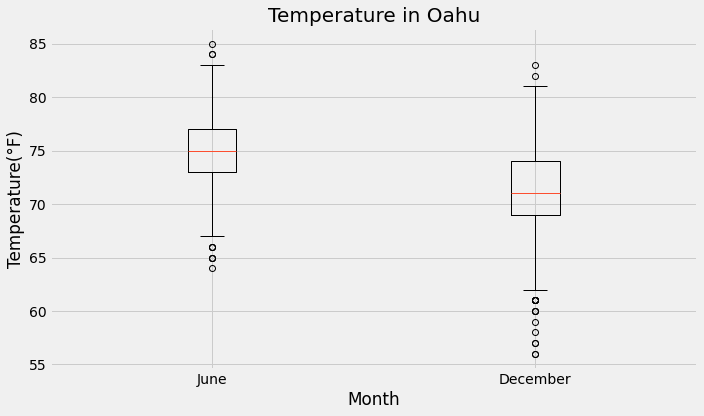

In [13]:
#plot box and whisker plots for June and December temperature
fig, ax = plt.subplots(figsize =(10,6))
x_labels = ["June", "December"]
temperature = [june_temp, dec_temp]
ax.set_title('Temperature in Oahu', fontsize =20)
ax.set_ylabel('Temperature(°F)')
ax.set_xlabel('Month')
ax.boxplot(temperature, labels = x_labels)
fig.tight_layout()
plt.savefig("Resources/Fig1.png")
plt.show()

In [14]:
#retrieve the precipitation date for June and December
prcp_june = list(np.ravel(session.query(Measurement.prcp).\
             filter(func.extract("month", Measurement.date) == 6).all()))
prcp_dec = list(np.ravel(session.query(Measurement.prcp).\
             filter(func.extract("month", Measurement.date) == 12).all()))
prcp_june_df = pd.DataFrame(prcp_june,columns =["June Prcp"])
prcp_dec_df = pd.DataFrame(prcp_dec,columns =["December Prcp"])


In [15]:
prcp_june_clean = prcp_june_df.fillna(0)['June Prcp']
prcp_june_clean.isnull().sum()

0

In [16]:
prcp_dec_clean = prcp_dec_df.fillna(0)["December Prcp"]
prcp_dec_clean

0       0.04
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
1512    0.14
1513    0.14
1514    1.03
1515    2.37
1516    0.90
Name: December Prcp, Length: 1517, dtype: float64

In [17]:
# Calculate and print out the summary statistics for the June Precipitation DataFrame.
prcp_june_df.describe()

,June Prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [18]:
# Calculate and print out the summary statistics for the Dec Precipitation DataFrame.
prcp_dec_df.describe()

,December Prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


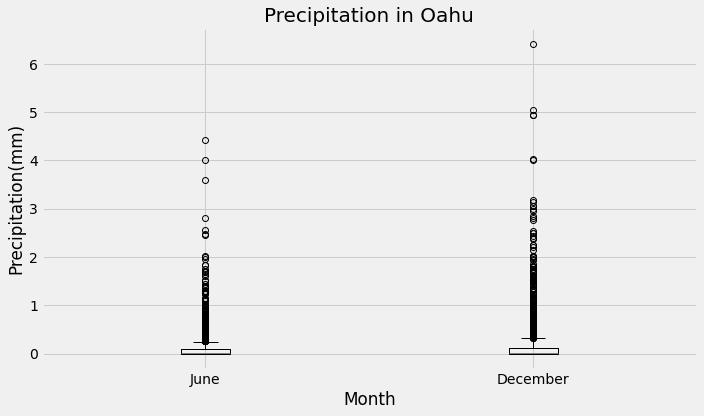

In [19]:
#plot box and whisker plots for June and December precipitation
fig, ax = plt.subplots(figsize =(10,6))
x_labels = ["June", "December"]
prcp = [prcp_june_clean, prcp_dec_clean]
ax.set_title('Precipitation in Oahu', fontsize =20)
ax.set_ylabel('Precipitation(mm)')
ax.set_xlabel('Month')
ax.boxplot(prcp, labels = x_labels)
fig.tight_layout()
plt.savefig("Resources/Fig2.png")
plt.show()